In [85]:
%load_ext autoreload
%autoreload 2

import numpy as np
from koala import pointsets
from matplotlib import pyplot as plt
from koala import voronization
from koala import plotting
from koala.lattice import cut_boundaries


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
from koala.example_graphs import *

graphs = []
graphs.append(tri_square_pent())
graphs.append(two_tri())
graphs.append(tutte_graph())
graphs.append(n_ladder(6,True))
points1 = pointsets.generate_random(50)
graphs.append(voronization.generate_lattice(points1))
points2 = pointsets.generate_bluenoise(30,3,3)
graphs.append(voronization.generate_lattice(points2))
graphs.append(cut_boundaries(voronization.generate_lattice(points2), [False,True]))
graphs.append(cut_boundaries(voronization.generate_lattice(points2), [True,True]))



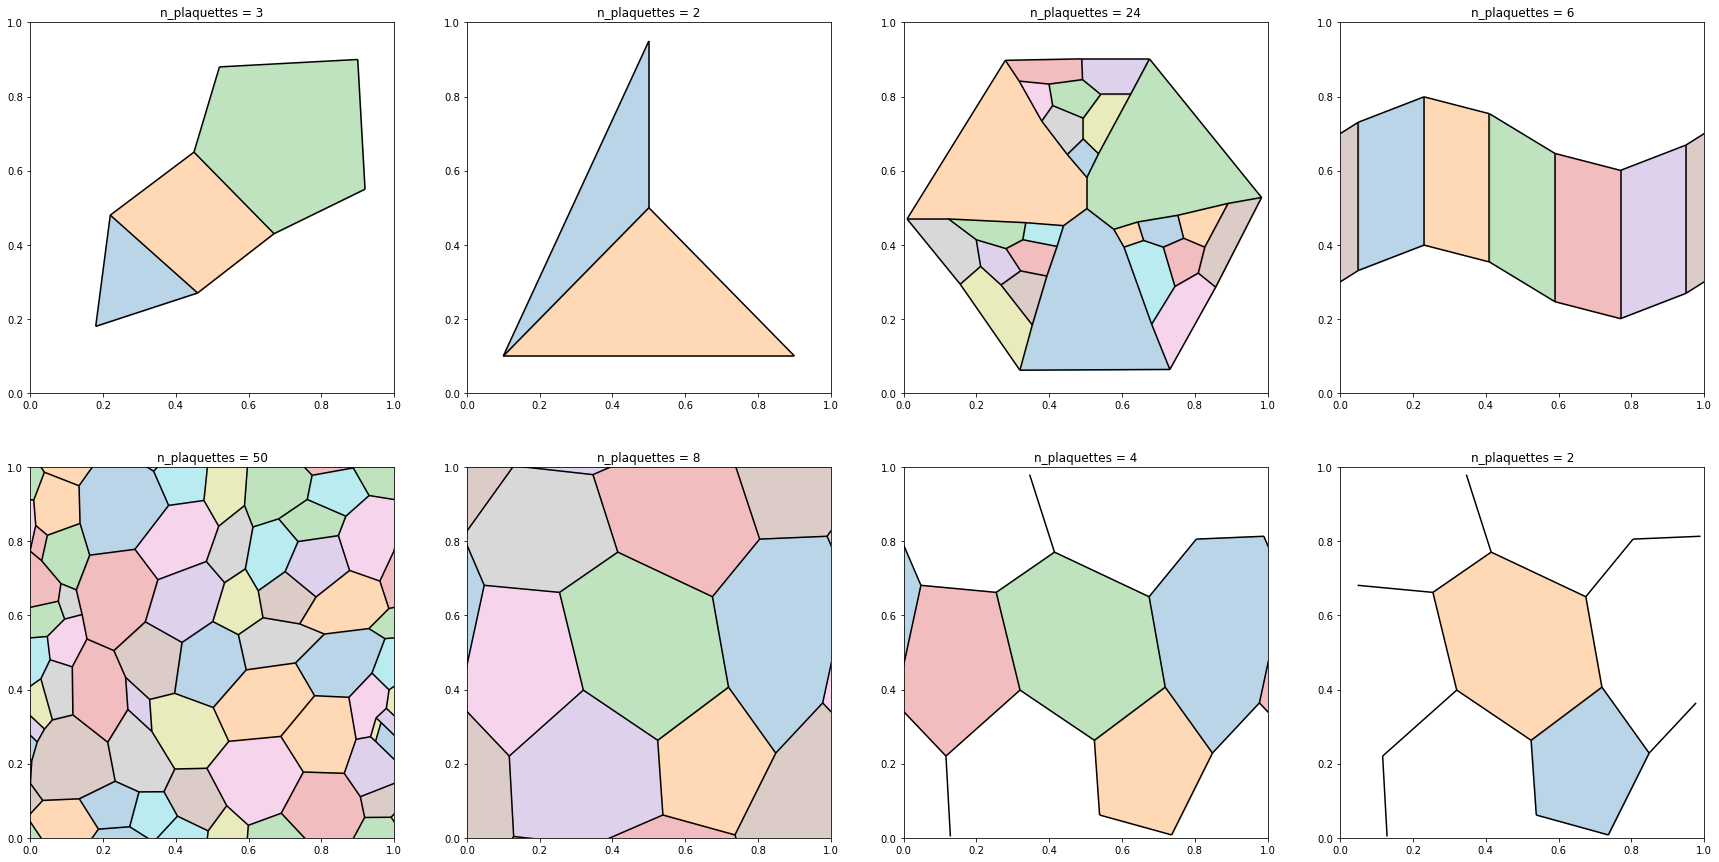

In [87]:
# now we plot the plaquettes

fig_len = round(len(graphs)/2+0.01)

fig, axes = plt.subplots(2,fig_len,figsize = (30,15))


for n,ax in enumerate(axes.flatten()):

    ax.set_title('n_plaquettes = '+ str(graphs[n].n_plaquettes))
    plotting.plot_lattice(graphs[n], ax)

    cmap = plt.get_cmap("tab10")
    plaq_labels = np.arange(graphs[n].n_plaquettes)
    color_scheme = cmap(plaq_labels % 10)

    plotting.plot_plaquettes(graphs[n], plaq_labels, color_scheme = color_scheme, ax = ax, polygon_args = dict(alpha = 0.3))